

*  Data Preprocessing











In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
spam=pd.read_csv('/content/25152746-spam.csv',sep='\t')

In [10]:
#data exploration
spam.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [11]:
#missing value identification 
spam.isna()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [12]:
spam.isna().sum() #there is no any missing values in dataset

label      0
message    0
length     0
punct      0
dtype: int64

In [13]:
spam.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [14]:
spam.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [18]:
spam['label'].value_counts()/len(spam)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [22]:
ham=spam[spam['label']=='ham']
spam=spam[spam['label']=='spam']

In [23]:
ham.shape , spam.shape

((4825, 4), (747, 4))

In [24]:
#make the shape same,keep the shape  balance
ham=ham.sample(spam.shape[0])

In [25]:
ham.shape , spam.shape

((747, 4), (747, 4))

In [29]:
data=ham.append(spam,ignore_index=True) #have exactly the same index

In [31]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [32]:
#quick visualization
data.head()

,label,message,length,punct
0,ham,Play w computer? Aiyah i tok 2 u lor?,37,2
1,ham,Okies... I'll go yan jiu too... We can skip ar...,95,12
2,ham,"Cool, I'll text you in a few",28,2
3,ham,I'm still looking for a car to buy. And have n...,76,3
4,ham,Spoke with uncle john today. He strongly feels...,382,11


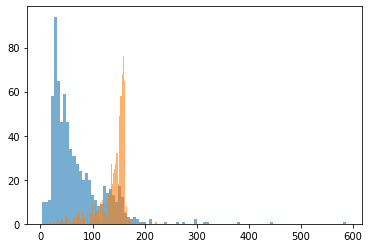

In [35]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.6)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.6)
plt.show()

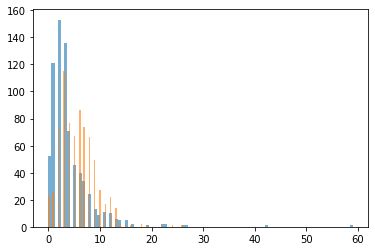

In [36]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.6)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.6)
plt.show()

In [37]:
data

,label,message,length,punct
0,ham,Play w computer? Aiyah i tok 2 u lor?,37,2
1,ham,Okies... I'll go yan jiu too... We can skip ar...,95,12
2,ham,"Cool, I'll text you in a few",28,2
3,ham,I'm still looking for a car to buy. And have n...,76,3
4,ham,Spoke with uncle john today. He strongly feels...,382,11
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)



*   Build the Model (Random Forest)



In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [51]:
classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=100))])

In [52]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])



*   Predicting the Results (RF)



In [54]:
y_pred=classifier.predict(X_test)

In [55]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam'

In [58]:
#evaluation
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [59]:
accuracy_score(y_test,y_pred)

0.9465478841870824

In [60]:
confusion_matrix(y_test,y_pred)

array([[226,   1],
       [ 23, 199]])

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449





*   Building the Model (SVM)



In [65]:
from sklearn.svm import SVC

In [68]:
svm=Pipeline([('tfidf',TfidfVectorizer()),('classifier',SVC(C=100,gamma='auto'))])

In [69]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])



*   Predicting the Results(SVM)



In [72]:
y_pred=svm.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred)

0.9465478841870824

In [75]:
confusion_matrix(y_test,y_pred)

array([[223,   4],
       [ 20, 202]])

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       227
        spam       0.98      0.91      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449

